## import libraries

In [2]:
import pandas as pd

In [7]:
import seaborn as sns

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv("clean_car_dataset.csv")

In [6]:
data

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.000000,46986.0,Diesel,90.0,1.0,0,2000,3,1165
1,1,13750,23.000000,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,2,13950,24.000000,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,3,14950,26.000000,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,4,13750,30.000000,38500.0,Diesel,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,55.672156,20544.0,Petrol,86.0,1.0,0,1300,3,1025
1432,1432,10845,72.000000,NaN,Petrol,86.0,0.0,0,1300,3,1015
1433,1433,8500,55.672156,17016.0,Petrol,86.0,0.0,0,1300,3,1015
1434,1434,7250,70.000000,NaN,Petrol,86.0,1.0,0,1300,3,1015


In [12]:
del data["Doors"]

In [13]:
data

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Weight
0,0,13500,23.000000,46986.0,Diesel,90.0,1.0,0,2000,1165
1,1,13750,23.000000,72937.0,Diesel,90.0,1.0,0,2000,1165
2,2,13950,24.000000,41711.0,Diesel,90.0,NaN,0,2000,1165
3,3,14950,26.000000,48000.0,Diesel,90.0,0.0,0,2000,1165
4,4,13750,30.000000,38500.0,Diesel,90.0,0.0,0,2000,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,55.672156,20544.0,Petrol,86.0,1.0,0,1300,1025
1432,1432,10845,72.000000,NaN,Petrol,86.0,0.0,0,1300,1015
1433,1433,8500,55.672156,17016.0,Petrol,86.0,0.0,0,1300,1015
1434,1434,7250,70.000000,NaN,Petrol,86.0,1.0,0,1300,1015


## EXPLORATORY DATA ANALYSIS
Frequency Table = crosstab: used to find the relationship b/n categorical data

In [16]:
pd.crosstab(index=data['FuelType'], columns= 'count')

col_0,count
FuelType,
CNG,15
Diesel,144
Petrol,1277


In [17]:
pd.crosstab(index=data['Automatic'], columns= data['FuelType'])

FuelType,CNG,Diesel,Petrol
Automatic,,,
0,15,144,1197
1,0,0,80


In [18]:
## selecting all the numerical cols
numerical_data= data.select_dtypes(exclude=[object])

In [20]:
numerical_data.columns


Index(['Unnamed: 0', 'Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

In [21]:
numerical_data.head()

,Unnamed: 0,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986.0,90.0,1.0,0,2000,3,1165
1,1,13750,23.0,72937.0,90.0,1.0,0,2000,3,1165
2,2,13950,24.0,41711.0,90.0,NaN,0,2000,3,1165
3,3,14950,26.0,48000.0,90.0,0.0,0,2000,3,1165
4,4,13750,30.0,38500.0,90.0,0.0,0,2000,3,1170


In [22]:
corr_matrix = numerical_data.corr()

In [23]:
corr_matrix

,Unnamed: 0,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
Unnamed: 0,1.000000,-0.738289,0.872938,0.279076,-0.108616,-0.078616,0.066299,-0.184490,-0.130268,-0.414577
Price,-0.738289,1.000000,-0.845111,-0.574720,0.309902,0.112041,0.033081,0.165067,0.185326,0.581198
Age,0.872938,-0.845111,1.000000,0.500985,-0.153498,-0.095713,0.030931,-0.116255,-0.151785,-0.442055
KM,0.279076,-0.574720,0.500985,1.000000,-0.335285,-0.093825,-0.081248,0.299993,-0.036191,-0.026271
HP,-0.108616,0.309902,-0.153498,-0.335285,1.000000,0.064749,0.013755,0.053758,0.097162,0.086737
MetColor,-0.078616,0.112041,-0.095713,-0.093825,0.064749,1.000000,-0.013973,0.029189,0.086203,0.057142
Automatic,0.066299,0.033081,0.030931,-0.081248,0.013755,-0.013973,1.000000,-0.069321,-0.027654,0.057249
CC,-0.184490,0.165067,-0.116255,0.299993,0.053758,0.029189,-0.069321,1.000000,0.126768,0.651450
Doors,-0.130268,0.185326,-0.151785,-0.036191,0.097162,0.086203,-0.027654,0.126768,1.000000,0.302618
Weight,-0.414577,0.581198,-0.442055,-0.026271,0.086737,0.057142,0.057249,0.651450,0.302618,1.000000


## plot a scattar diagram b/n Age and Price


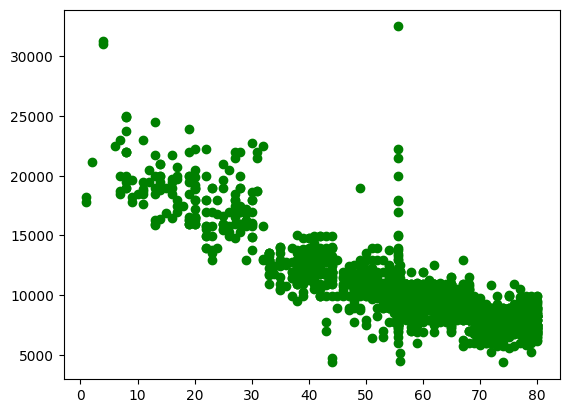

In [21]:
plt.scatter(data['Age'],data['Price'], c='green')
plt.show()

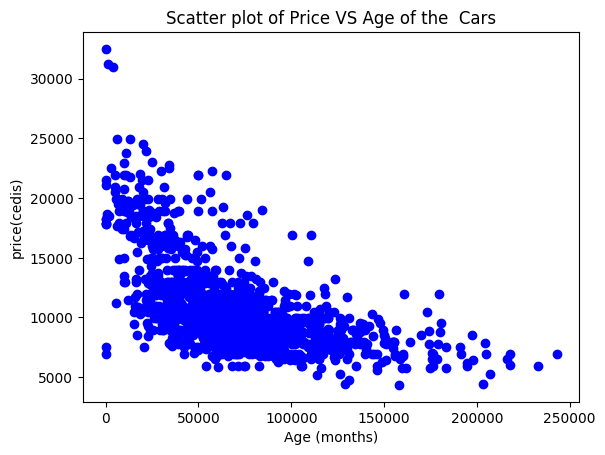

In [28]:
plt.scatter(data['KM'],data['Price'], c='blue')
plt.title("Scatter plot of Price VS Age of the  Cars")
plt.xlabel('Age (months)')
plt.ylabel('price(cedis)')
plt.savefig("scatter_plot_price_age.png")

plt.show()

## USING HISTOGRAMMS 
for Numerical data

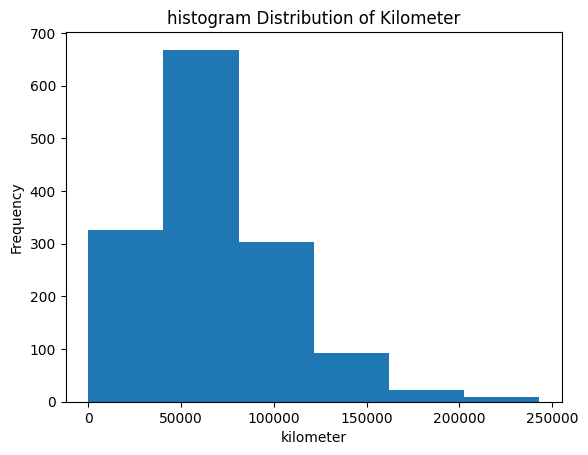

In [40]:
plt.hist(data['KM'], bins=6)
plt.title("histogram Distribution of Kilometer")
plt.xlabel('kilometer')
plt.ylabel('Frequency')
plt.show()

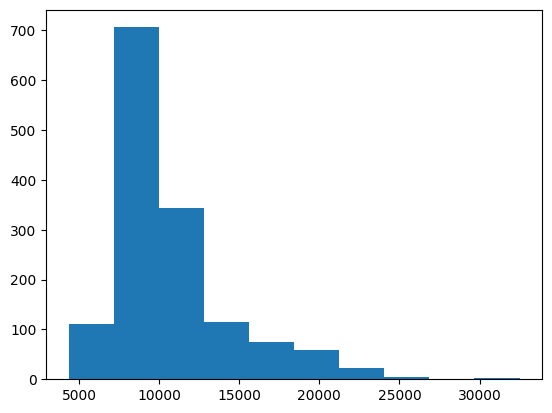

In [30]:
plt.hist(data['P'])
plt.show()

## USING BAR PLOT 
for categorical data

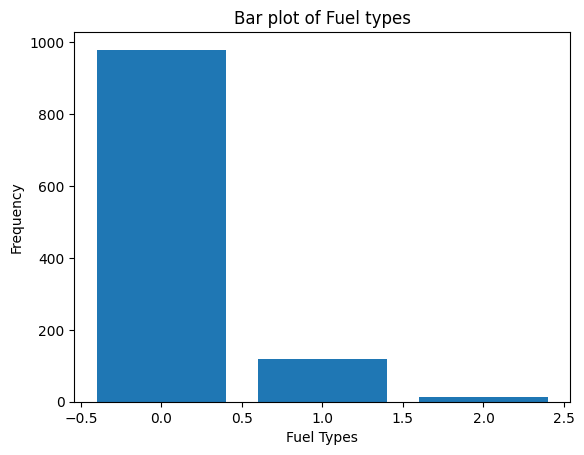

In [41]:
counts = [979,120,12]
FuelType = ('Petrol','Diseal','CNG')
index = np.arange(len(FuelType))

plt.bar(index, counts)

plt.title('Bar plot of Fuel types')

plt.xlabel('Fuel Types')
plt.ylabel('Frequency')

plt.show()



## USING SEABORN 

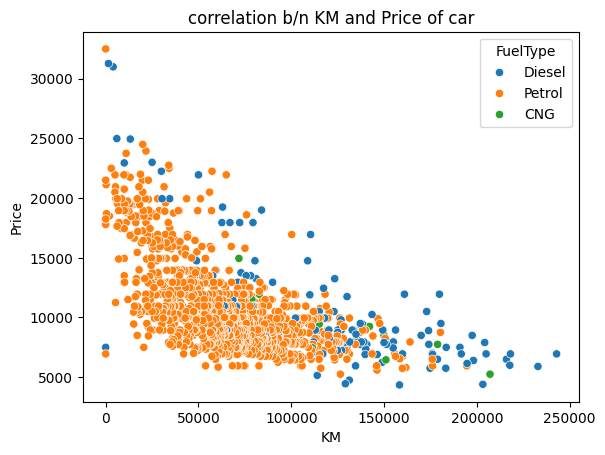

In [11]:
##Scatter plot b/n age and  price using seaborn
sns.scatterplot(data= data,x='KM', y='Price', hue='FuelType')
plt.title("correlation b/n KM and Price of car")
plt.xlabel('KM')
plt.ylabel('Price')
plt.show()

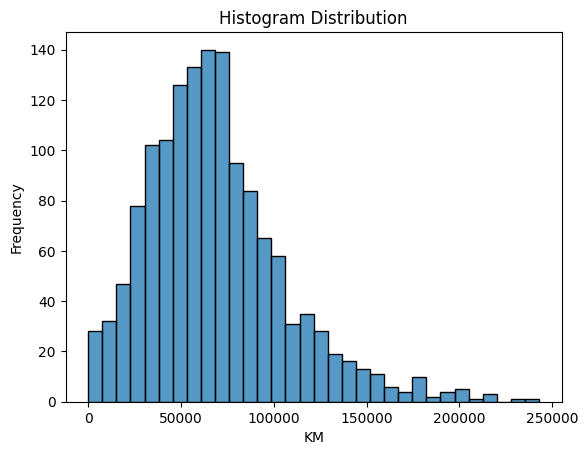

In [14]:
sns.histplot(data=data, x='KM')
plt.title("Histogram Distribution")
plt.xlabel('KM')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='FuelType', ylabel='Price'>

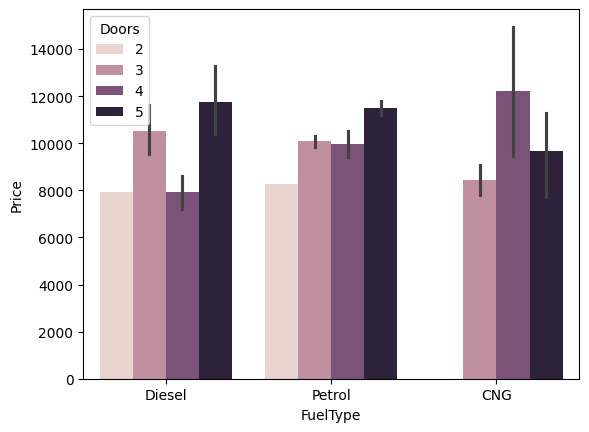

In [16]:
sns.barplot(data=data, y='Price',x='FuelType', hue='Doors')